<a href="https://colab.research.google.com/github/bachviet/bachviet/blob/main/Tuan9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
x = np.uint8([250])
y = np.uint8([10])
print (cv2.add(x,y)) 
print (x+y) 


[[255]]
[4]


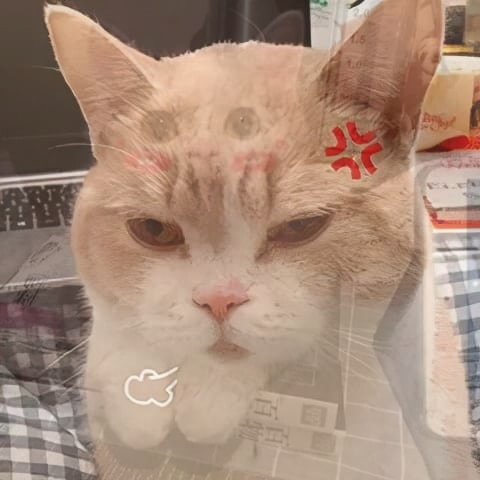

In [64]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
img1 = cv2.imread('/content/download.jpg')
img2 = cv2.imread('/content/download2.jpg')
dst = cv2.addWeighted(img1,0.7,img2,0.3,0)





cv2_imshow(dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

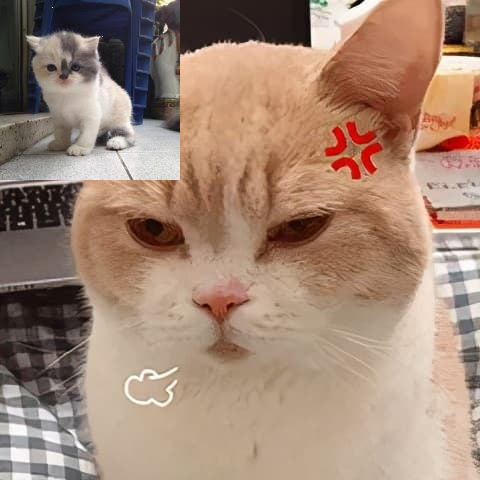

In [72]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
# Load two images
img1 = cv2.imread('/content/download.jpg')
img2 = cv2.imread('/content/download3.jpg')
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
cv2_imshow(img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [83]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
img1 = cv2.imread('/content/download.jpg')
e1 = cv2.getTickCount()
for i in range(5,49,2):
  img1 = cv2.medianBlur(img1,i)
e2 = cv2.getTickCount()
t = (e2 - e1)/cv2.getTickFrequency()
print (t)

0.576102828


In [90]:
In [5]: cv2.useOptimized()
Out[5]: True
In [6]: %timeit res = cv2.medianBlur(img,49)

# Disable it
In [7]: cv2.setUseOptimized(False)
In [8]: cv2.useOptimized()
Out[8]: False
In [9]: %timeit res = cv2.medianBlur(img,49)


10 loops, best of 3: 26.8 ms per loop
10 loops, best of 3: 27 ms per loop


In [92]:
In [10]: x = 5
In [11]: %timeit y=x**2

In [12]: %timeit y=x*x

In [15]: z = np.uint8([5])
In [17]: %timeit y=z*z


The slowest run took 5.84 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 231 ns per loop
10000000 loops, best of 3: 50 ns per loop
The slowest run took 224.16 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 501 ns per loop
